In [1]:
import numpy as np


In [3]:
# 欠損値（Nan）を含むデータ
with open('2D_example_dame.csv') as f:
    print(f.read())

1,-7.428476,1.509903
0,2.980693,1.960821
0,3.988255,4.636389
1,-5.789437,-4.621614
1,-4.894447,-326.9730
1,-1.933949,-0.047276
0,-1.611771,5.932201
1,-6.670152,-1.036282
1,-293.1415,-0.104475
0,-0.074762,1.070002
1,-2.691793,4.168774
0,0.461182,3.453438
0,-1.354135,3.751657
1,-6.229476,-1.209434
0,2.778594,NaN
1,-5.719578,-0.243509
0,0.928322,3.208520
0,0.850475,2.908955
1,NaN,-1.831199
0,1.116025,3.353602



In [4]:
data = np.loadtxt("2D_example_dame.csv", delimiter=",")

In [5]:
y = data[:,0].astype(int) # 一列目（ラベル）を整数に変換

In [6]:
y

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [7]:
X = data[:, 1:3]

In [9]:
X 
# 欠損値がある場合、データを埋める、もしくは取り除く必要あり。
# 例えば、埋める場合だと、平均値・中央値で補完するなど。

array([[-7.428476e+00,  1.509903e+00],
       [ 2.980693e+00,  1.960821e+00],
       [ 3.988255e+00,  4.636389e+00],
       [-5.789437e+00, -4.621614e+00],
       [-4.894447e+00, -3.269730e+02],
       [-1.933949e+00, -4.727600e-02],
       [-1.611771e+00,  5.932201e+00],
       [-6.670152e+00, -1.036282e+00],
       [-2.931415e+02, -1.044750e-01],
       [-7.476200e-02,  1.070002e+00],
       [-2.691793e+00,  4.168774e+00],
       [ 4.611820e-01,  3.453438e+00],
       [-1.354135e+00,  3.751657e+00],
       [-6.229476e+00, -1.209434e+00],
       [ 2.778594e+00,           nan],
       [-5.719578e+00, -2.435090e-01],
       [ 9.283220e-01,  3.208520e+00],
       [ 8.504750e-01,  2.908955e+00],
       [          nan, -1.831199e+00],
       [ 1.116025e+00,  3.353602e+00]])

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.set_cmap(plt.cm.Paired) # 色の設定

<Figure size 432x288 with 0 Axes>

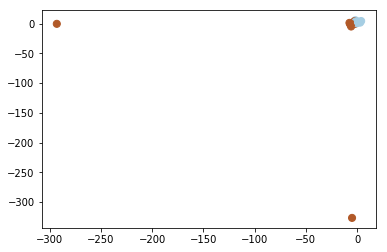

In [12]:
plt.scatter(X[:,0], X[:,1], c=y, s=50) 

(-10, 10)

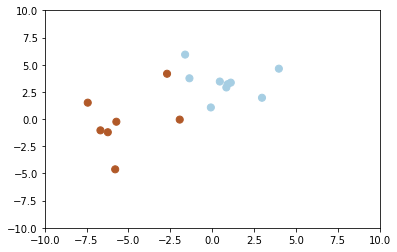

In [13]:
plt.scatter(X[:,0], X[:,1], c=y, s=50) 
plt.xlim(-10, 10)
plt.ylim(-10, 10)

## 対策その１：Nanないし、外れ値のデータを削除する

In [15]:
~np.isnan(X[:,0]) # Nanがあるかどうか、判定する

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True])

In [16]:
~np.isnan(X[:,1]) # Nanがあるかどうか、判定する

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True])

In [17]:
# Nanを含むデータをカットしている
X1 = X[~np.isnan(X[:,1]) & ~np.isnan(X[:,0])]
y1 = y[~np.isnan(X[:,1]) & ~np.isnan(X[:,0])]

In [19]:
X1, X1.shape # Nanが除外されていることが確認できる

(array([[-7.428476e+00,  1.509903e+00],
        [ 2.980693e+00,  1.960821e+00],
        [ 3.988255e+00,  4.636389e+00],
        [-5.789437e+00, -4.621614e+00],
        [-4.894447e+00, -3.269730e+02],
        [-1.933949e+00, -4.727600e-02],
        [-1.611771e+00,  5.932201e+00],
        [-6.670152e+00, -1.036282e+00],
        [-2.931415e+02, -1.044750e-01],
        [-7.476200e-02,  1.070002e+00],
        [-2.691793e+00,  4.168774e+00],
        [ 4.611820e-01,  3.453438e+00],
        [-1.354135e+00,  3.751657e+00],
        [-6.229476e+00, -1.209434e+00],
        [-5.719578e+00, -2.435090e-01],
        [ 9.283220e-01,  3.208520e+00],
        [ 8.504750e-01,  2.908955e+00],
        [ 1.116025e+00,  3.353602e+00]]), (18, 2))

In [21]:
(abs(X1[:,0]) < 10, abs(X1[:,1]) < 10) # 外れ値をあぶり出す。Falseの箇所が外れ値

(array([ True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True,  True]),
 array([ True,  True,  True,  True, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True]))

In [23]:
X2 = X1[(abs(X1[:,0]) < 10) & (abs(X1[:,1]) < 10)]
y2 = y1[(abs(X1[:,0]) < 10) & (abs(X1[:,1]) < 10)]

In [25]:
X2, X2.shape # 外れ値である239、－312のデータが取り除かれているのが、わかる

(array([[-7.428476,  1.509903],
        [ 2.980693,  1.960821],
        [ 3.988255,  4.636389],
        [-5.789437, -4.621614],
        [-1.933949, -0.047276],
        [-1.611771,  5.932201],
        [-6.670152, -1.036282],
        [-0.074762,  1.070002],
        [-2.691793,  4.168774],
        [ 0.461182,  3.453438],
        [-1.354135,  3.751657],
        [-6.229476, -1.209434],
        [-5.719578, -0.243509],
        [ 0.928322,  3.20852 ],
        [ 0.850475,  2.908955],
        [ 1.116025,  3.353602]]), (16, 2))

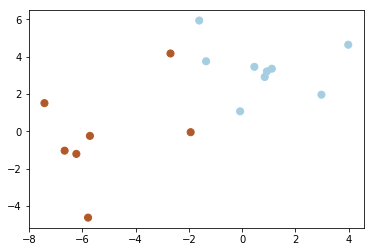

In [27]:
plt.scatter(X2[:,0], X2[:,1], c=y2, s=50) 

## 対策その２：Nanないし外れ値のデータに平均値で補填する
データを消してもいいけど、データ数がどんどん減るため、サンプル数が少ない場合はこちらのほうが良い？

In [28]:
# 欠損・外れデータに対して、平均値を補填するモジュール
from sklearn.preprocessing import Imputer

In [29]:
missing_value_to_mean = Imputer()

In [30]:
missing_value_to_mean.fit(X)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [31]:
X

array([[-7.428476e+00,  1.509903e+00],
       [ 2.980693e+00,  1.960821e+00],
       [ 3.988255e+00,  4.636389e+00],
       [-5.789437e+00, -4.621614e+00],
       [-4.894447e+00, -3.269730e+02],
       [-1.933949e+00, -4.727600e-02],
       [-1.611771e+00,  5.932201e+00],
       [-6.670152e+00, -1.036282e+00],
       [-2.931415e+02, -1.044750e-01],
       [-7.476200e-02,  1.070002e+00],
       [-2.691793e+00,  4.168774e+00],
       [ 4.611820e-01,  3.453438e+00],
       [-1.354135e+00,  3.751657e+00],
       [-6.229476e+00, -1.209434e+00],
       [ 2.778594e+00,           nan],
       [-5.719578e+00, -2.435090e-01],
       [ 9.283220e-01,  3.208520e+00],
       [ 8.504750e-01,  2.908955e+00],
       [          nan, -1.831199e+00],
       [ 1.116025e+00,  3.353602e+00]])

In [33]:
X_new = missing_value_to_mean.transform(X) 
X_new # Nanがあった場所が平均値で埋められている

array([[-7.42847600e+00,  1.50990300e+00],
       [ 2.98069300e+00,  1.96082100e+00],
       [ 3.98825500e+00,  4.63638900e+00],
       [-5.78943700e+00, -4.62161400e+00],
       [-4.89444700e+00, -3.26973000e+02],
       [-1.93394900e+00, -4.72760000e-02],
       [-1.61177100e+00,  5.93220100e+00],
       [-6.67015200e+00, -1.03628200e+00],
       [-2.93141500e+02, -1.04475000e-01],
       [-7.47620000e-02,  1.07000200e+00],
       [-2.69179300e+00,  4.16877400e+00],
       [ 4.61182000e-01,  3.45343800e+00],
       [-1.35413500e+00,  3.75165700e+00],
       [-6.22947600e+00, -1.20943400e+00],
       [ 2.77859400e+00, -1.57953962e+01],
       [-5.71957800e+00, -2.43509000e-01],
       [ 9.28322000e-01,  3.20852000e+00],
       [ 8.50475000e-01,  2.90895500e+00],
       [-1.70755753e+01, -1.83119900e+00],
       [ 1.11602500e+00,  3.35360200e+00]])

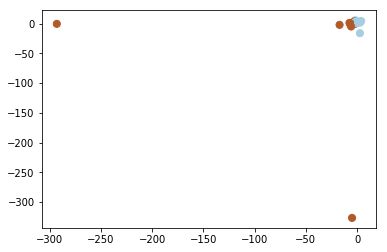

In [35]:
plt.scatter(X_new[:,0], X_new[:,1], c=y, s=50) 

In [39]:
# 中央値をあてがっている
missing_value_to_median = Imputer(strategy='median')
missing_value_to_median.fit(X)
X_new2 = missing_value_to_median.transform(X)
X_new2

array([[-7.428476e+00,  1.509903e+00],
       [ 2.980693e+00,  1.960821e+00],
       [ 3.988255e+00,  4.636389e+00],
       [-5.789437e+00, -4.621614e+00],
       [-4.894447e+00, -3.269730e+02],
       [-1.933949e+00, -4.727600e-02],
       [-1.611771e+00,  5.932201e+00],
       [-6.670152e+00, -1.036282e+00],
       [-2.931415e+02, -1.044750e-01],
       [-7.476200e-02,  1.070002e+00],
       [-2.691793e+00,  4.168774e+00],
       [ 4.611820e-01,  3.453438e+00],
       [-1.354135e+00,  3.751657e+00],
       [-6.229476e+00, -1.209434e+00],
       [ 2.778594e+00,  1.509903e+00],
       [-5.719578e+00, -2.435090e-01],
       [ 9.283220e-01,  3.208520e+00],
       [ 8.504750e-01,  2.908955e+00],
       [-1.611771e+00, -1.831199e+00],
       [ 1.116025e+00,  3.353602e+00]])

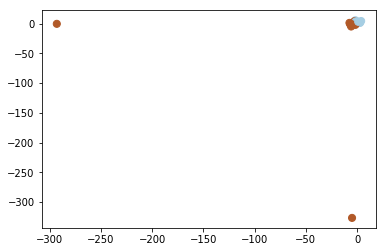

In [38]:
plt.scatter(X_new2[:,0], X_new2[:,1], c=y, s=50)